In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/trip.csv')

In [3]:
data.head(5)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [4]:
data.tail()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00
22700,Benjamin Miller,03/02/2017 1:02:49 PM,03/02/2017 1:16:09 PM,Cash,1,2.10,11.0,2.35,0.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [6]:
# 결측치 확인
data.isna().sum()

,0
passenger_name,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
payment_method,0
passenger_count,0
trip_distance,0
fare_amount,3
tip_amount,0
tolls_amount,0


In [9]:
# fare_amount 컬럼 결측값 인덱스 출력
fare_amount_na_index = data[data['fare_amount'].isna()].index
fare_amount_na_index

Index([52, 189, 244], dtype='int64')

In [10]:
# fare_amount 컬럼의 결측치 제거
data['fare_amount'].dropna()

,fare_amount
0,13.0
1,16.0
2,6.5
3,20.5
4,16.5
...,...
22696,4.0
22697,52.0
22698,4.5
22699,10.5


In [11]:
# 결측치 제거 되었는지 확인
data.isna().sum()

,0
passenger_name,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
payment_method,0
passenger_count,0
trip_distance,0
fare_amount,3
tip_amount,0
tolls_amount,0


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='passenger_count'>

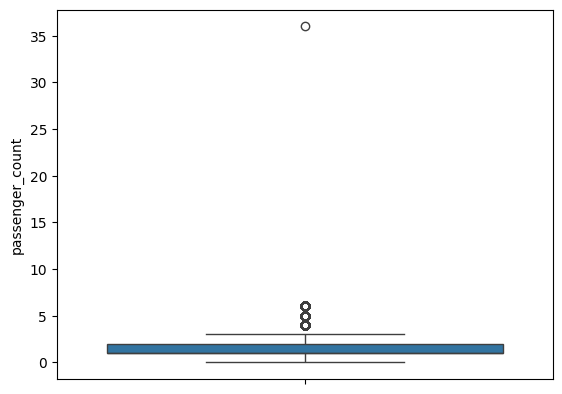

In [13]:
# 이상치 확인
sns. boxplot(data['passenger_count'])

In [15]:
# passenger_count 이상치 확인
data['passenger_count'].sort_values()

,passenger_count
21754,0
21640,0
21218,0
20312,0
19458,0
...,...
4047,6
21106,6
12249,6
12274,6


In [16]:
data['passenger_count'].sort_values(ascending=False)

,passenger_count
64,36
12440,6
12432,6
4121,6
15406,6
...,...
4062,0
3354,0
1927,0
1876,0


In [17]:
# passenger_count 컬럼의 평균
data['passenger_count'].mean()

np.float64(1.6435839830844456)

In [28]:
def pas_count_min(x):
  if x == 0:
    return 1.64
  else:
    return x
pas_count_min(0)

1.64

In [29]:
# passenger_count 컬럼에 pass_count 함수 적용
data['passenger_count'].apply(pas_count_min)

,passenger_count
0,6.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
22696,3.0
22697,1.0
22698,1.0
22699,1.0


In [38]:
def pas_count_min(y):
  if y > 35:
    return 1.64
  else:
    return y
pas_count_min(36)

1.64

In [39]:
# passenger_count 컬럼에 pass_count 함수 적용
data['passenger_count'] = data['passenger_count'].apply(pas_count_min)

In [41]:
# 중복데이터 추출
data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1.0,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1.0,4.2,21.0,0.00,0.0


In [42]:
# 중복데이터 삭제
data = data.drop_duplicates()

In [52]:
# credit card / debit card 이름 바꾸기
data['payment_method'].str.strip()

,payment_method
0,Debit Card
1,Debit Card
2,Debit Card
3,Cash
4,Debit Card
...,...
22696,Cash
22697,Cash
22698,Debit Card
22699,Debit Card


In [54]:
data.loc[:, 'payment_method_clean'] = data['payment_method'].map({'Debit Card':'Card', 'Credit Card':'Card'})

In [56]:
data['payment_method_clean']

,payment_method_clean
0,Card
1,Card
2,Card
3,NaN
4,Card
...,...
22696,NaN
22697,NaN
22698,Card
22699,Card


In [57]:
# fare_amount 컬럼의 결측치 제거
data['payment_method_clean'].dropna()

,payment_method_clean
0,Card
1,Card
2,Card
4,Card
5,Card
...,...
22688,Card
22690,Card
22691,Card
22698,Card
